# Algunos algoritmos de Scikit-Learn
##  ¿Qué aprenderemos hoy?
-   Arboles de desicion
-   Random Forest
-   K-Vecinos Mas Cercanos (KNN)


##  Arboles de descicion


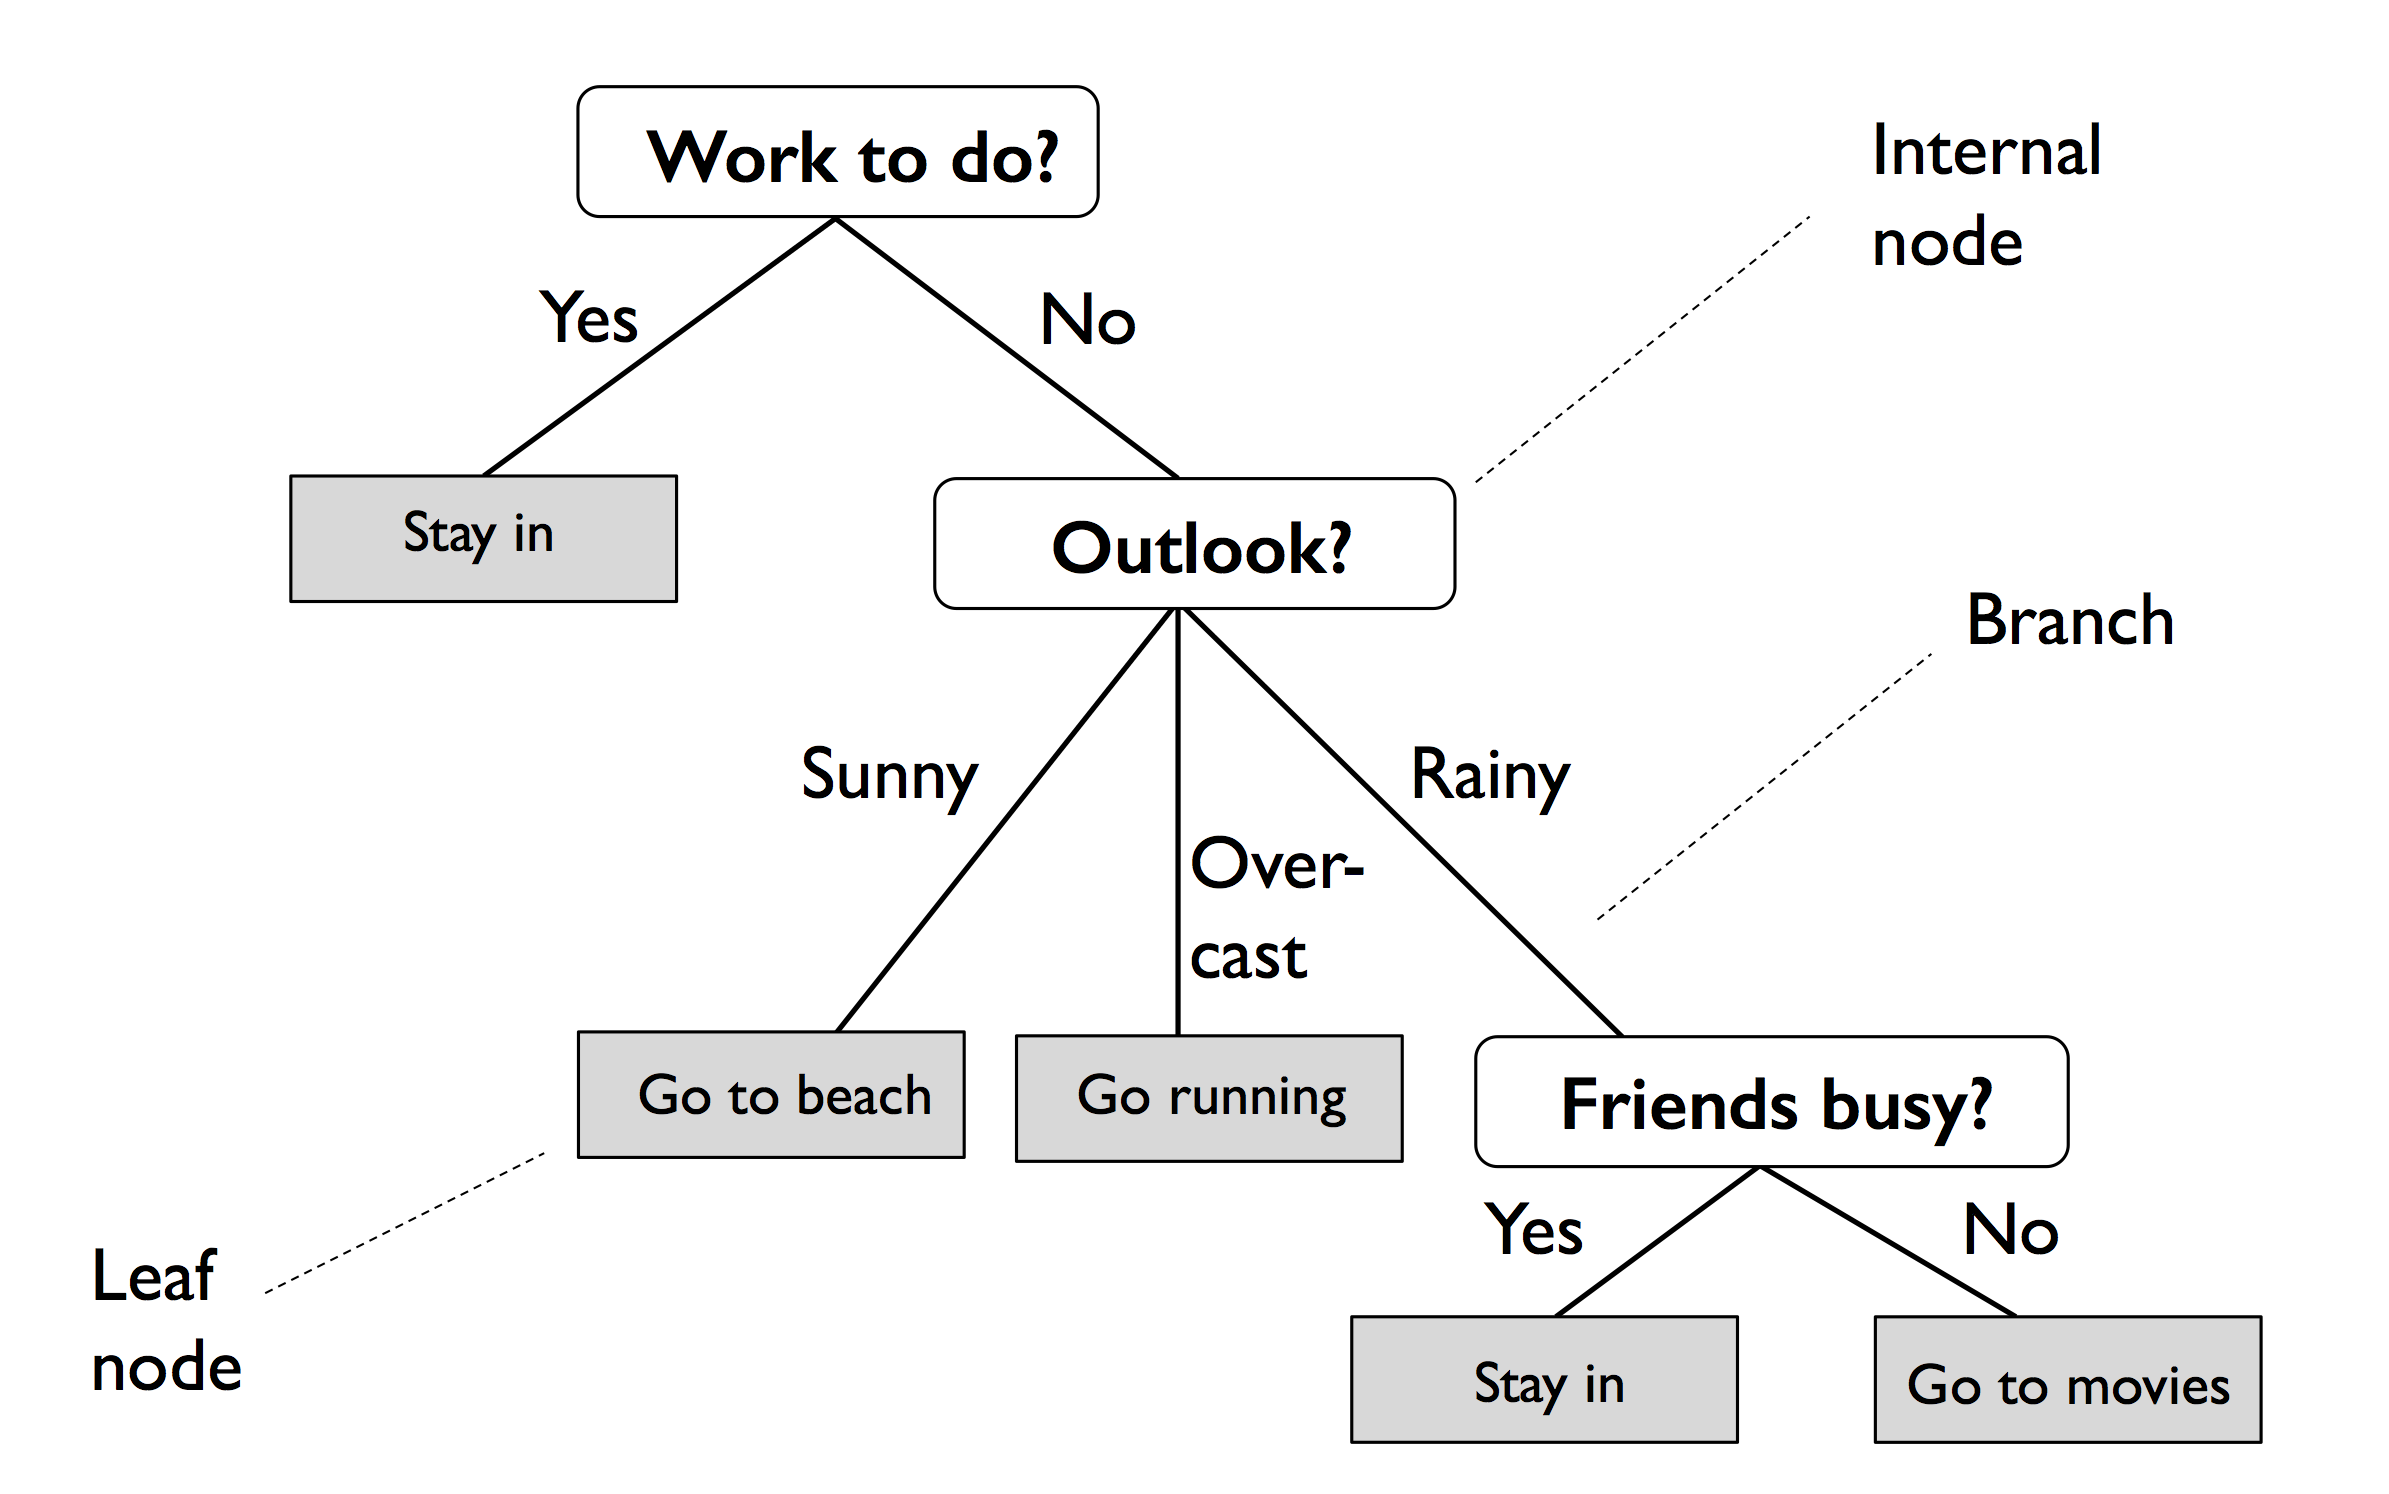

In [29]:
from IPython.display import Image
Image(filename=r'Imagenes_Clase_06/6_2.png', width=700)


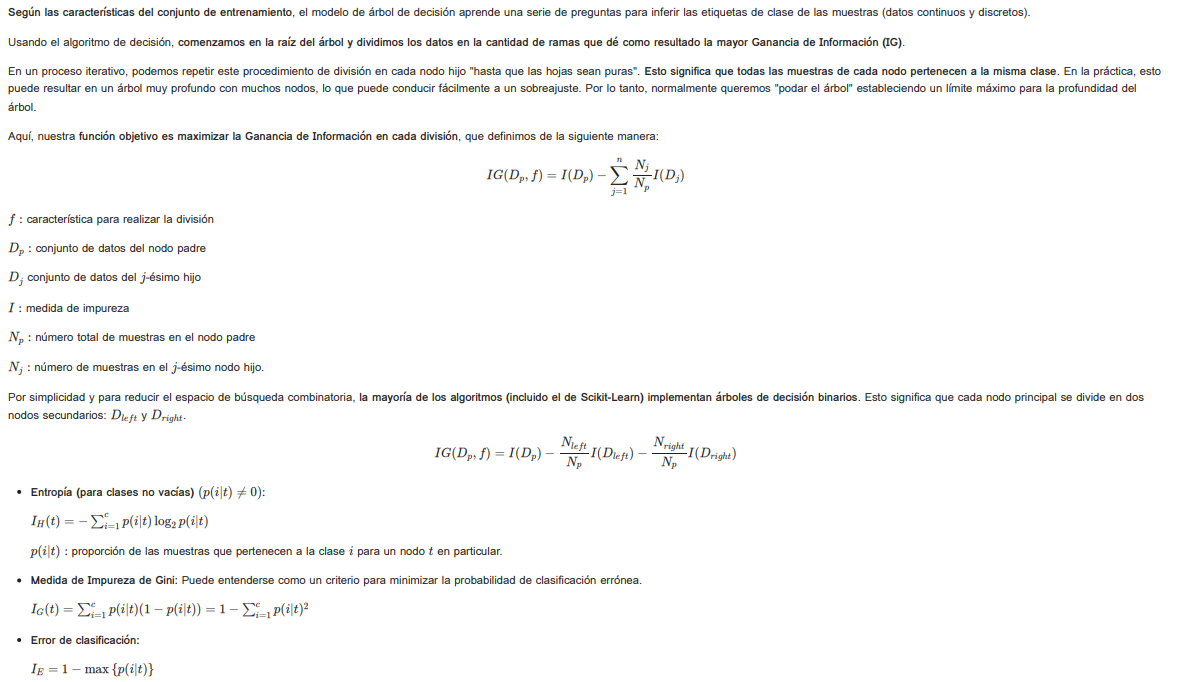

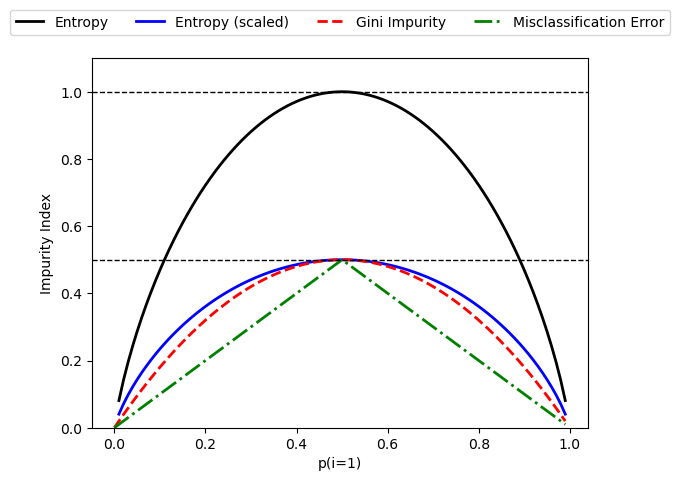

In [30]:
import matplotlib.pyplot as plt
import numpy as np
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))
def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy','Entropy (scaled)','Gini Impurity','Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'blue', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center',bbox_to_anchor=(0.5, 1.15),ncol=5,fancybox=True,shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
#plt.savefig('images/03_19.png', dpi=300, bbox_
plt.show()

##  Datos Iris


In [31]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
name_columns = ['sepal_length','sepal_width','petal_length','petal_width']
name_variables=list(name_columns[2:4])
print(name_variables)
y = iris.target
name_clases=np.unique(y)
print('Etiquetas de Clase:', name_clases)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print('Cantidad de etiquetas en y:', np.bincount(y))
print('Cantidad de etiquetas en y_train:', np.bincount(y_train))
print('Cantidad de etiquetas en y_test:', np.bincount(y_test))


['petal_length', 'petal_width']
Etiquetas de Clase: [0 1 2]
Cantidad de etiquetas en y: [50 50 50]
Cantidad de etiquetas en y_train: [35 35 35]
Cantidad de etiquetas en y_test: [15 15 15]


##  Función para plotear

In [32]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, plot_object,test_idx=None,
only_train=False, only_test=False,
clases_names=['clase 0','clase 1'],
resolution=0.02):
    markers = ('s', 'o', '^', 'v', 'x')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
 
 
    plot_object.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
 
    if not(only_test):
        for idx, cl in enumerate(np.unique(y)):
            plot_object.scatter(x=X[y == cl, 0],y=X[y == cl, 1],
                                alpha=0.8,c=colors[idx],
                                marker=markers[idx],label=clases_names[idx],
                                edgecolor='black')
    if not(test_idx is None) and not(only_train):
        X_test, y_test = X[test_idx, :], y[test_idx]
        for idx, cl in enumerate(np.unique(y_test)):
            plot_object.scatter(x=X_test[y_test == cl, 0],
                                y=X_test[y_test == cl, 1],
                                alpha=0.8,c=colors[idx],marker=markers[idx],
                                label=clases_names[idx],edgecolor='black')


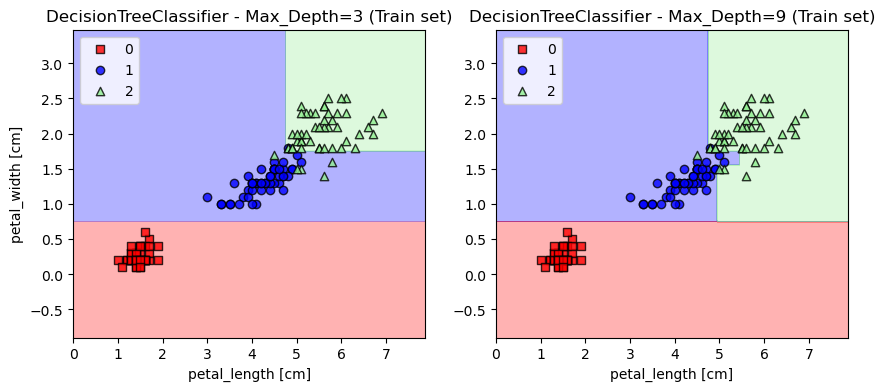

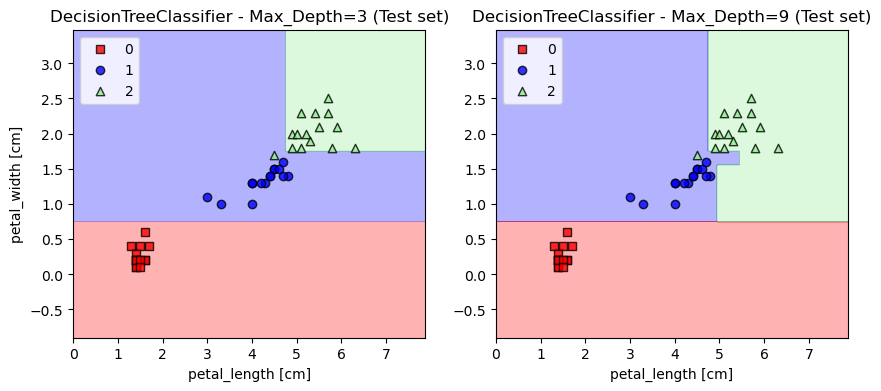

In [33]:
from sklearn.tree import DecisionTreeClassifier
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
Profundidad=[3,9]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
for idx in range(len(Profundidad)):
    tree = DecisionTreeClassifier(criterion='gini',
                                  max_depth=Profundidad[idx], random_state=1)
    tree.fit(X_train, y_train)
    plot_decision_regions(X_combined, y_combined,classifier=tree,
                          plot_object=axs[idx], test_idx=range(105, 150),
                          only_train=True,clases_names=name_clases)
    axs[idx].set_xlabel(f'{name_variables[0]} [cm]')
    if idx==0:
        axs[idx].set_ylabel(f'{name_variables[1]} [cm]')
    axs[idx].set_title(f'DecisionTreeClassifier - Max_Depth={Profundidad[idx]} (Train set)')
    axs[idx].legend(loc='upper left')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
for idx in range(len(Profundidad)):
    tree = DecisionTreeClassifier(criterion='gini',
                                  max_depth=Profundidad[idx], random_state=1)
    tree.fit(X_train, y_train)
    plot_decision_regions(X_combined, y_combined,classifier=tree,
                          plot_object=axs[idx], test_idx=range(105, 150),
                          only_test=True,clases_names=name_clases)
    axs[idx].set_xlabel(f'{name_variables[0]} [cm]')
    if idx==0:
        axs[idx].set_ylabel(f'{name_variables[1]} [cm]')
    axs[idx].set_title(f'DecisionTreeClassifier - Max_Depth={Profundidad[idx]} (Test set)')
    axs[idx].legend(loc='upper left')
plt.show()


##  Random Forest
##  Combinando múltiples árboles mediante Random Forest

La idea detrás de Random Forest es promediar múltiples árboles de decisión (profundos) que individualmente sufren de alta varianza, para construir un modelo más robusto que tenga un mejor rendimiento de generalización y
sea menos susceptible al sobreajuste.

**El algoritmo de Random Forest lo podemos resumir en cuatro pasos:**
1. Elejir aleatoriamente muestras del conjunto de entrenamiento (con reemplazo).
2. Hacer crecer un árbol de decisiones a partir de una muestra de partida. En cada nodo:
    -   Seleccionar características al azar sin reemplazo.
    -   Dividir el nodo utilizando la función que proporcione la mejor división de acuerdo con la función objetivo.
3. Repitir los pasos 1-2 veces.
4. Agregar la predicción por cada árbol para asignar la etiqueta de clase por mayoría de votos.

**Es un algoritmo no tan sensible a los Hiperparámetros.** Por lo general, no necesitamos "podar el bosque aleatorio" ya que el modelo en conjunto es bastante robusto al ruido de los árboles de decisión individuales. El único
parámetro que realmente debemos preocuparnos (en la práctica) es el número de árboles (paso 3) que elegimos.

**NOTA:** En la mayoría de las implementaciones, incluida la implementación de RandomForestClassifier en Scikit-Learn, el tamaño de la muestra de partida se elige para que sea igual al número de muestras en el conjunto de
entrenamiento original, lo que generalmente proporciona una buena compensación de sesgo-varianza. Para el número de características en cada división, queremos elegir un valor que sea menor que el número total de
características en el conjunto de entrenamiento. Un valor predeterminado razonable que se usa en Scikit-Learn y otras implementaciones es , donde es el número de características en el conjunto de entrenamiento.


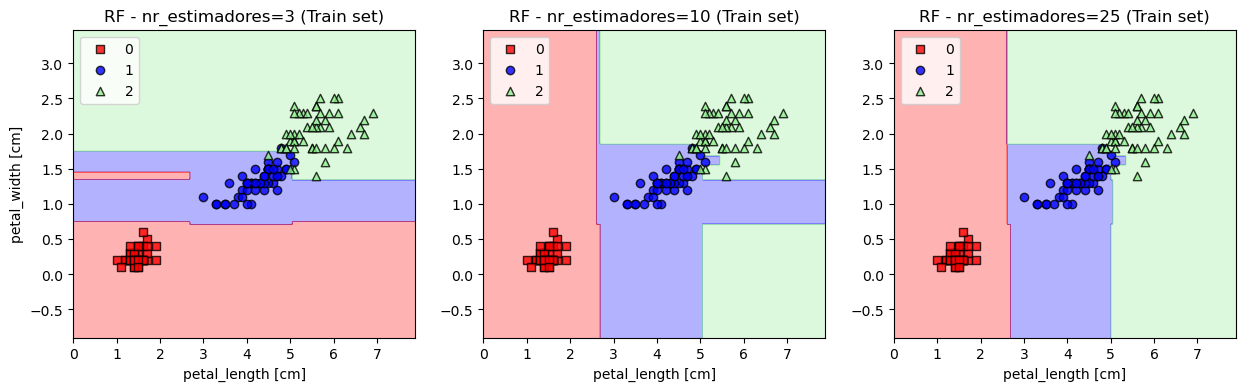

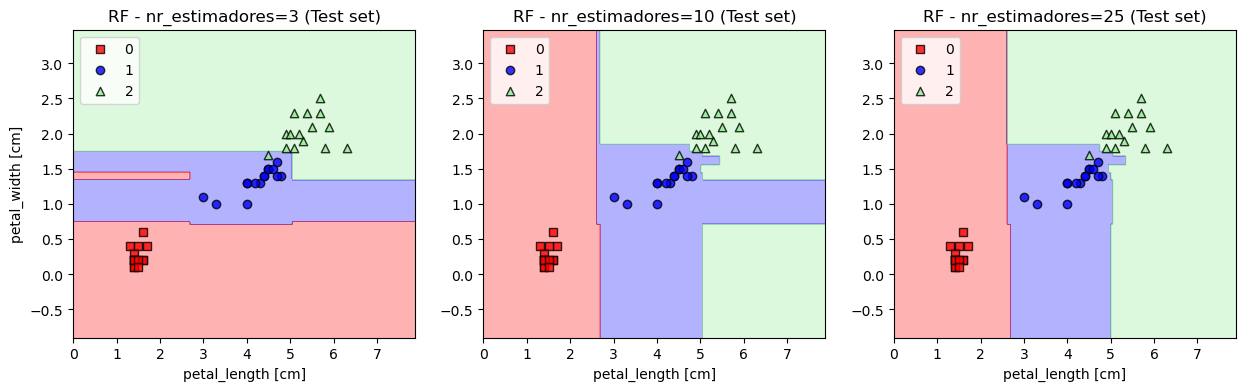

In [34]:
from sklearn.ensemble import RandomForestClassifier
estimadores=[3,10,25]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
for idx in range(len(estimadores)):
    forest = RandomForestClassifier(criterion='gini', n_estimators=estimadores[idx],
                                    random_state=1, n_jobs=-1)
    forest.fit(X_train, y_train)
    plot_decision_regions(X_combined, y_combined, classifier=forest,
                          plot_object=axs[idx], test_idx=range(105, 150),
                          only_train=True,clases_names=name_clases)
    axs[idx].set_xlabel(f'{name_variables[0]} [cm]')
    if idx==0:
        axs[idx].set_ylabel(f'{name_variables[1]} [cm]')
    axs[idx].set_title(f'RF - nr_estimadores={estimadores[idx]} (Train set)')
    axs[idx].legend(loc='upper left')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
for idx in range(len(estimadores)):
    forest = RandomForestClassifier(criterion='gini', n_estimators=estimadores[idx],
                                    random_state=1, n_jobs=-1)
    forest.fit(X_train, y_train)
    plot_decision_regions(X_combined, y_combined, classifier=forest,
                          plot_object=axs[idx], test_idx=range(105, 150),
                          only_test=True,clases_names=name_clases)
    axs[idx].set_xlabel(f'{name_variables[0]} [cm]')
    if idx==0:
        axs[idx].set_ylabel(f'{name_variables[1]} [cm]')
    axs[idx].set_title(f'RF - nr_estimadores={estimadores[idx]} (Test set)')
    axs[idx].legend(loc='upper left')
plt.show()


##  *K*-Vecinos Mas Cercanos (KNN)
    -   Ejemplo de aprendíz perezoso. Memoriza el conjunto de datos de entrenamiento.
    -   Modelo No Paramétrico subclasificado como de Aprendizaje Basado en instancias.

**Algorito:**
    1. Elejir el número y una métrica de distancia.
    2. Encontrar los vecinos más cercanos de la muestra que se quiere clasificar.
    3. Asignar la etiqueta de la clase por mayoría de votos (clase más representada).

Según la métrica de distancia elegida, el algoritmo KNN encuentra las muestras, en el conjunto de datos de entrenamiento, que están más cerca (más similares) al punto que queremos clasificar.

**Ventaja:** El clasificador se adapta inmediatamente a medida que recopilamos nuevos datos de entrenamiento.

**Desventaja:** La complejidad computacional para clasificar nuevas muestras crece linealmente con la cantidad de muestras en el conjunto de datos de entrenamiento en el peor de los casos, a menos que el conjunto de datos
tenga muy pocas dimensiones (características) y el algoritmo se haya implementado utilizando datos eficientes.


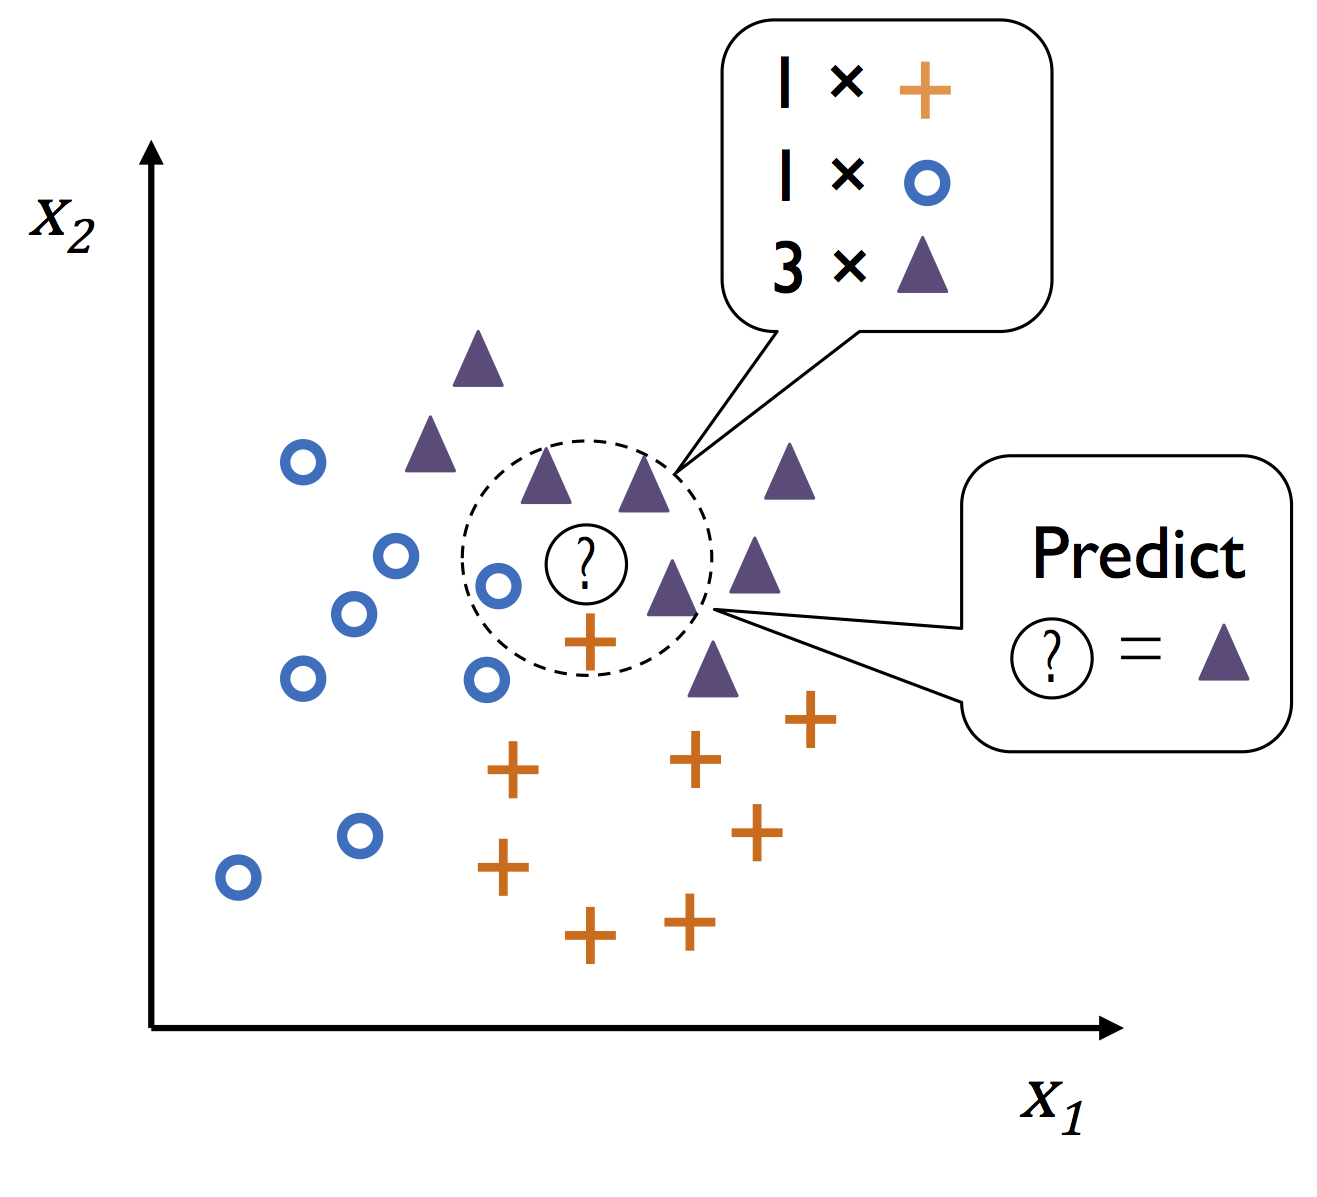

In [35]:
Image(filename=r'Imagenes_Clase_06/6_3.png', width=600)


##  Escalando

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


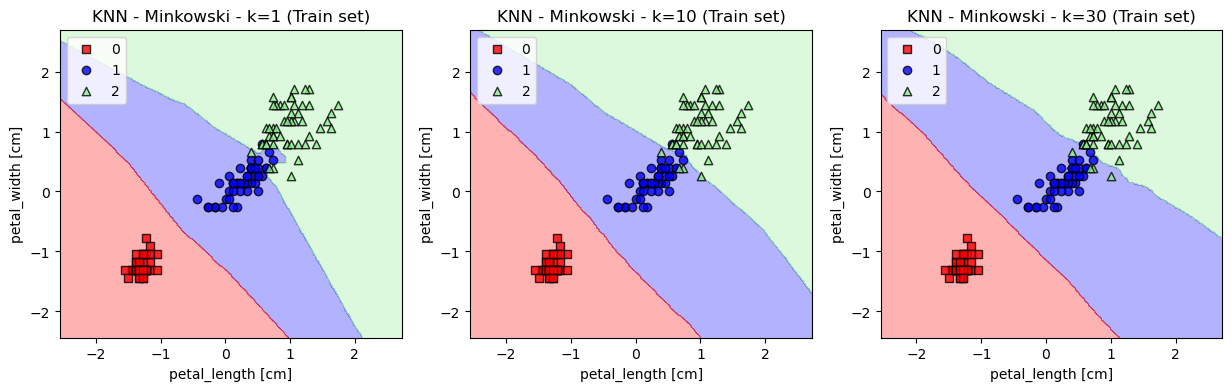

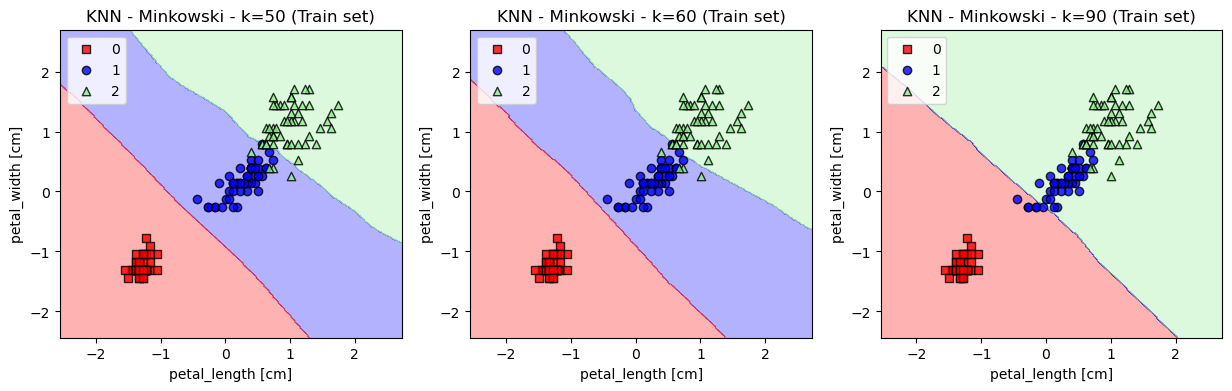

In [37]:
from sklearn.neighbors import KNeighborsClassifier
vecinos=[1,10,30,50,60,90]
for idx, c in enumerate(vecinos):
    knn = KNeighborsClassifier(n_neighbors=c, p=2, metric='minkowski', n_jobs=-1)
    knn.fit(X_train_std, y_train)
    if idx%3==0:
        fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
    plot_decision_regions(X_combined_std, y_combined,classifier=knn,
                          plot_object=axs[idx%3],test_idx=range(105, 150),
                          only_train=True,clases_names=name_clases)
    axs[idx%3].set_xlabel(f'{name_variables[0]} [cm]')
    axs[idx%3].set_ylabel(f'{name_variables[1]} [cm]')
    axs[idx%3].set_title(f'KNN - Minkowski - k={c} (Train set)')
    axs[idx%3].legend(loc='upper left')

    if idx%3==2:
        plt.show()


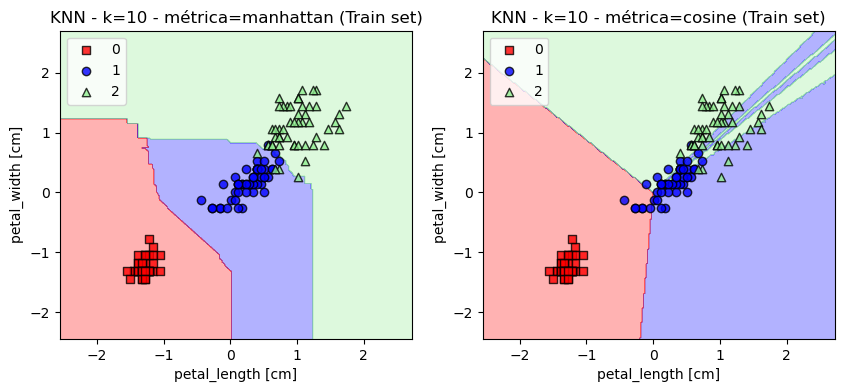

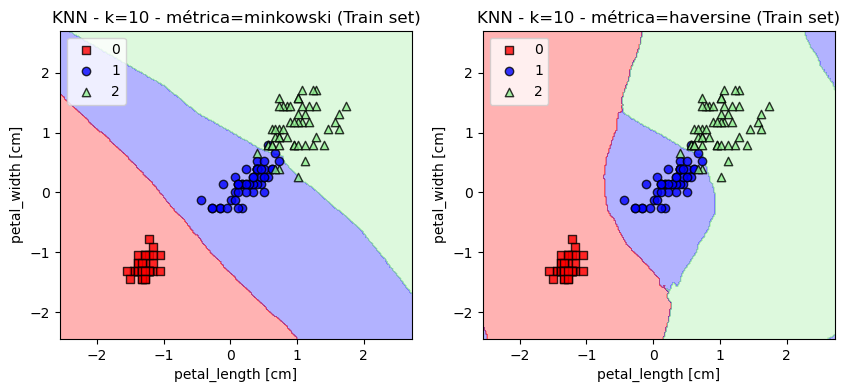

In [38]:
metricas=['manhattan','cosine','minkowski','haversine',]
for idx, c in enumerate(metricas):
    knn = KNeighborsClassifier(n_neighbors=10, p=2, metric=c, n_jobs=-1)
    knn.fit(X_train_std, y_train)
    if idx%2==0:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    plot_decision_regions(X_combined_std, y_combined,classifier=knn,
                          plot_object=axs[idx%2],test_idx=range(105, 150),
                          only_train=True,clases_names=name_clases)
    axs[idx%2].set_xlabel(f'{name_variables[0]} [cm]')
    axs[idx%2].set_ylabel(f'{name_variables[1]} [cm]')
    axs[idx%2].set_title(f'KNN - k=10 - métrica={c} (Train set)')
    axs[idx%2].legend(loc='upper left')

    if idx%2==2:
        plt.show()
